In [1]:
import pandas as pd
import os

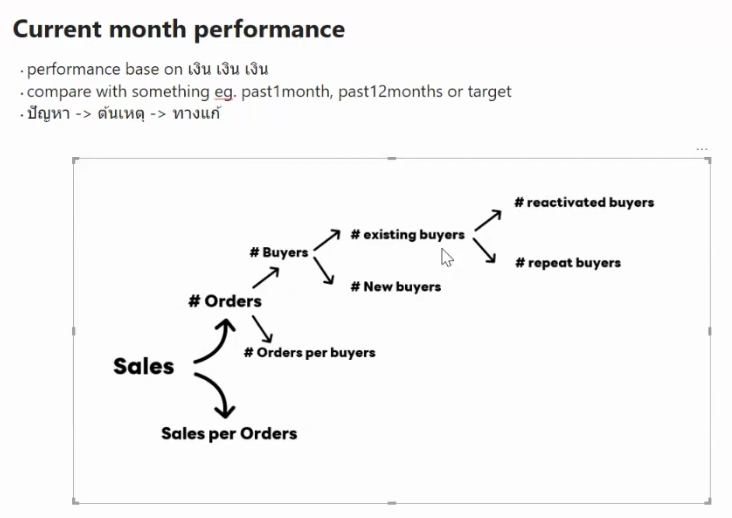

In [86]:
path = r"C:\Users\Admin\Documents\GitHub\Data-Science-Bootcamp\Online Retail Dashboard with Power BI and Python"
file_name = r"data\online_retail_II.csv"

retail_df = pd.read_csv(os.path.join(path, file_name), encoding="utf8", parse_dates=["InvoiceDate"])

retail_df.columns = retail_df.columns.str.lower().str.replace(" ", "_")

In [87]:
retail_df.sample(10)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
199987,508614,84791,GINGHAM HEART DECORATION,2,2010-05-17 13:18:00,2.95,13432.0,United Kingdom
857845,566061,23289,DOLLY GIRL CHILDRENS BOWL,8,2011-09-08 15:36:00,1.25,13267.0,United Kingdom
712936,552975,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-05-12 13:58:00,2.95,17932.0,United Kingdom
715807,553189,85152,HAND OVER THE CHOCOLATE SIGN,1,2011-05-15 13:14:00,2.10,15033.0,United Kingdom
286934,517325,85111,SILVER GLITTER FLOWER VOTIVE HOLDER,288,2010-07-28 12:41:00,0.29,15873.0,United Kingdom
195673,508092,84989A,75 GREEN FAIRY CAKE CASES,2,2010-05-12 17:20:00,0.55,17180.0,United Kingdom
668964,548703,22999,TRAVEL CARD WALLET RETRO PETALS,1,2011-04-03 11:37:00,0.42,16010.0,United Kingdom
265977,515118,21054,NURSE'S BAG SOFT TOY,1,2010-07-08 13:31:00,8.95,12782.0,Portugal
66909,495352,22056,CERAMIC PLATE LOVE HEART DESIGN,4,2010-01-24 11:15:00,1.49,17335.0,United Kingdom
699540,551739,22917,HERB MARKER ROSEMARY,2,2011-05-04 10:58:00,0.65,18118.0,United Kingdom


In [88]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   invoice      1067371 non-null  object        
 1   stockcode    1067371 non-null  object        
 2   description  1062989 non-null  object        
 3   quantity     1067371 non-null  int64         
 4   invoicedate  1067371 non-null  datetime64[ns]
 5   price        1067371 non-null  float64       
 6   customer_id  824364 non-null   float64       
 7   country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


## Manipulating Missing values

In [89]:
# Check NA
retail_df.isnull().sum()

invoice             0
stockcode           0
description      4382
quantity            0
invoicedate         0
price               0
customer_id    243007
country             0
dtype: int64

In [90]:
# Drop rows with missing values in the "Customer ID" column
# Customer ID = NA are not yet members
retail_df.dropna(subset=["customer_id"],inplace=True)
print(retail_df.isnull().sum())

print("\nshape of data is")
print("(no.rows, no.columns) = ", retail_df.shape)

invoice        0
stockcode      0
description    0
quantity       0
invoicedate    0
price          0
customer_id    0
country        0
dtype: int64

shape of data is
(no.rows, no.columns) =  (824364, 8)


## Deleting Cancel invoice

In [91]:
retail_df[retail_df["invoice"].str.startswith("C")].sample(10)

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
361172,C524343,22138,BAKING SET 9 PIECE RETROSPOT,-2,2010-09-28 16:09:00,4.95,13107.0,United Kingdom
655962,C547495,22384,LUNCH BAG PINK POLKADOT,-2,2011-03-23 12:11:00,1.65,15021.0,United Kingdom
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
508172,C536850,22591,CARDHOLDER GINGHAM CHRISTMAS TREE,-50,2010-12-03 09:47:00,2.55,14213.0,United Kingdom
258399,C514340,21159,MOODY BOY DOOR HANGER,-1,2010-07-01 15:01:00,1.45,14527.0,United Kingdom
322991,C520853,22423,REGENCY CAKESTAND 3 TIER,-3,2010-08-31 13:13:00,10.95,12709.0,Germany
599742,C542413,22142,CHRISTMAS CRAFT WHITE FAIRY,-10,2011-01-27 17:11:00,1.45,16923.0,United Kingdom
637308,C545836,21067,VINTAGE RED TEATIME MUG,-1,2011-03-07 13:19:00,1.25,14606.0,United Kingdom
517472,C537602,21843,RED RETROSPOT CAKE STAND,-1,2010-12-07 12:45:00,9.95,17511.0,United Kingdom
750762,C556647,82583,HOT BATHS METAL SIGN,-24,2011-06-13 16:14:00,2.10,13012.0,United Kingdom


In [84]:
retail_df = retail_df.drop(retail_df[retail_df["invoice"].str.startswith("C")], axis=1)

## Checking Stock code and Description 

In [92]:
retail_df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [29]:
retail_df["stockcode"].value_counts()

stockcode
85123A    5322
22423     3777
85099B    3446
84879     2794
20725     2755
          ... 
21766        1
37477C       1
20939        1
72751C       1
90011E       1
Name: count, Length: 4646, dtype: int64

In [30]:
retail_df[["description", "stockcode"]].value_counts()

description                         stockcode
WHITE HANGING HEART T-LIGHT HOLDER  85123A       5315
REGENCY CAKESTAND 3 TIER            22423        3777
ASSORTED COLOUR BIRD ORNAMENT       84879        2794
JUMBO BAG RED RETROSPOT             85099B       2776
LUNCH BAG  BLACK SKULL.             20727        2161
                                                 ... 
GREEN CHENILLE SHAGGY C/COVER       46138D          1
GREEN CRYSTAL DROP EARRINGS         90011C          1
SET OF 4 KNICK KNACK TINS  DOILEY   23240           1
ASSORTED SHAPED STENCIL FOR HENNA   17061           1
FLOWER FAIRY MUG+COASTER,ROSE       37477C          1
Name: count, Length: 5331, dtype: int64

In [31]:
retail_df[retail_df["stockcode"] == "85123A"]["price"].value_counts()

price
2.95    4148
2.55    1145
5.79       9
2.36       6
3.24       5
3.20       5
1.90       1
2.10       1
2.29       1
2.40       1
Name: count, dtype: int64